In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/feergm/Prediccion-de-ataque-cardiaco/main/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [ ]:
# Renombrar los encabezados en español
df = df.rename(columns={
    'age': 'Edad',
    'sex': 'Sexo',
    'cp': 'Tipo_dolor_pecho',
    'trestbps': 'Presion_arterial_reposo',
    'chol': 'Colesterol_serico',
    'fbs': 'Azucar_sangre_ayunas',
    'restecg': 'Resultado_electrocardiografico_reposo',
    'thalach': 'Frecuencia_cardiaca_maxima',
    'exang': 'Angina_inducida_ejercicio',
    'oldpeak': 'Depresion_ST',
    'slope': 'Inclinacion_ST_ejercicio_pico',
    'ca': 'Vasos_principales_color_fluoroscopia',
    'thal': 'Talasemia',
    'target': 'Objetivo'
})

# Verificar los nuevos encabezados
df.head()

,Edad,Sexo,Tipo_dolor_pecho,Presion_arterial_reposo,Colesterol_serico,Azucar_sangre_ayunas,Resultado_electrocardiografico_reposo,Frecuencia_cardiaca_maxima,Angina_inducida_ejercicio,Depresion_ST,Inclinacion_ST_ejercicio_pico,Vasos_principales_color_fluoroscopia,Talasemia,Objetivo
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [ ]:
#Promedio
df.mean()

Edad                                      54.434146
Sexo                                       0.695610
Tipo_dolor_pecho                           0.942439
Presion_arterial_reposo                  131.611707
Colesterol_serico                        246.000000
Azucar_sangre_ayunas                       0.149268
Resultado_electrocardiografico_reposo      0.529756
Frecuencia_cardiaca_maxima               149.114146
Angina_inducida_ejercicio                  0.336585
Depresion_ST                               1.071512
Inclinacion_ST_ejercicio_pico              1.385366
Vasos_principales_color_fluoroscopia       0.754146
Talasemia                                  2.323902
Objetivo                                   0.536390
dtype: float64

La edad promedio en nuestro dataset es de 54 años.


#Mediana
Obtendremos la mediana de algunas de nuestras variables.

In [ ]:
# Seleccionar solo las variables numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calcular la mediana de cada variable numérica
medians = numeric_columns.median()

# Mostrar las medianas
print("Mediana de cada variable numérica:")
print(medians)


Mediana de cada variable numérica:
Edad                                      56.00
Sexo                                       1.00
Tipo_dolor_pecho                           1.00
Presion_arterial_reposo                  130.00
Colesterol_serico                        240.00
Azucar_sangre_ayunas                       0.00
Resultado_electrocardiografico_reposo      1.00
Frecuencia_cardiaca_maxima               152.00
Angina_inducida_ejercicio                  0.00
Depresion_ST                               0.80
Inclinacion_ST_ejercicio_pico              1.00
Vasos_principales_color_fluoroscopia       0.00
Talasemia                                  2.00
Objetivo                                   0.71
dtype: float64


#Boxplot

Los boxplots son una manera de visualizar la distribución de nuestros datos usando percentiles.

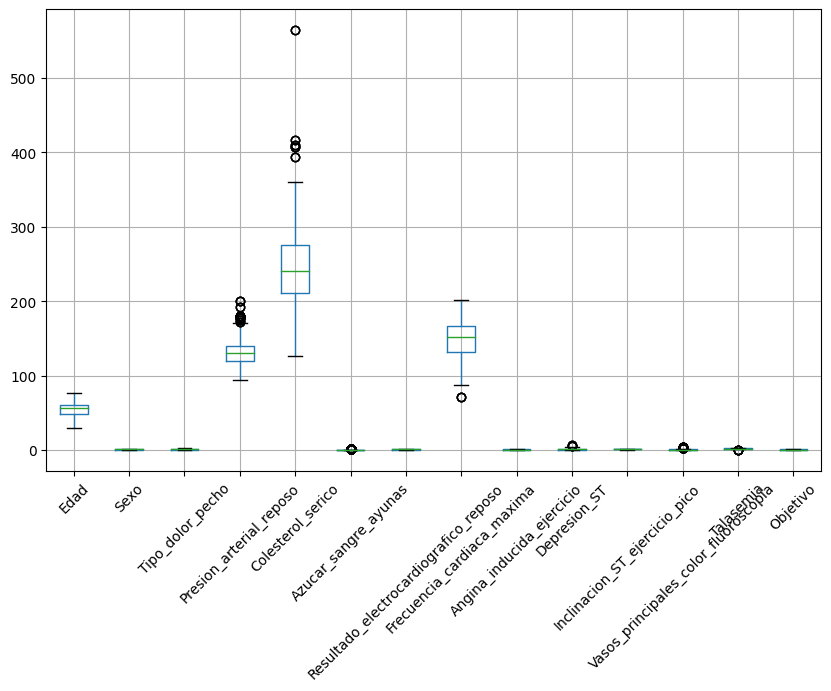

In [ ]:
# Graficar diagrama de cajas para variables numéricas
df.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.show()


#Boxplots de cada variable y su rango intercuartílico

Para los boxplots solo usamos variables que tuvieran valores que no fueran solo 0 y 1. En este caso solo fueron las variables de Edad, Presion arterial, Colesterol serico, Frecuencia cardiaca y  Depresion ST. Las variables faltantes preferimos visualizarlas mediante histogramas.

Rango Intercuantílico: 13.00 años
Límite inferior de los bigotes: 28.5
Límite superior de los bigotes: 80.5


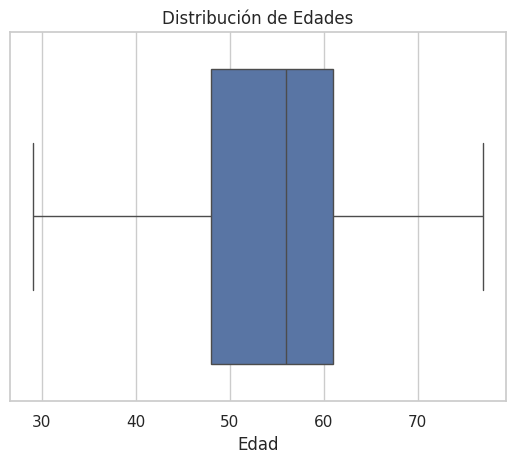

In [ ]:
sns.set(style='whitegrid')
sns.boxplot(x=df['Edad'])
plt.title('Distribución de Edades')

#Rango Intercuartílico
iqr_edad = df['Edad'].quantile(0.75) - df['Edad'].quantile(0.25)
print(f'Rango Intercuantílico: {iqr_edad:,.2f} años')

#Obtendremos el límite inferior y superior de nuestra variable Edad.
Q1 = df['Edad'].quantile(0.25)
Q3 = df['Edad'].quantile (0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - (1.5* IQR)
limite_superior = Q3 + (1.5 * IQR)

print('Límite inferior de los bigotes:', limite_inferior)
print('Límite superior de los bigotes:', limite_superior)

Rango Intercuantílico: 20.00 mm Hg
Límite inferior de los bigotes: 90.0
Límite superior de los bigotes: 170.0


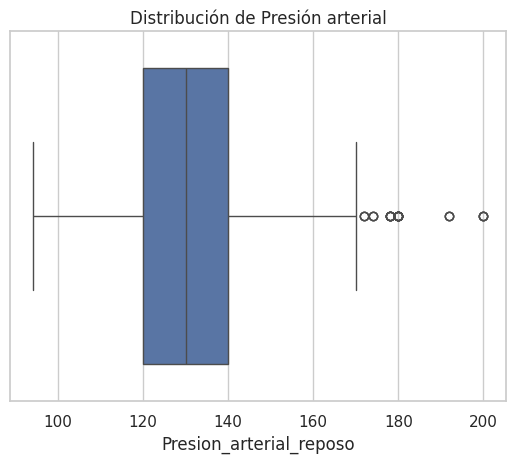

In [ ]:
sns.set(style='whitegrid')
sns.boxplot(x=df['Presion_arterial_reposo'])
plt.title('Distribución de Presión arterial')

#Rango Intercuartílico
iqr_P = df['Presion_arterial_reposo'].quantile(0.75) - df['Presion_arterial_reposo'].quantile(0.25)
print(f'Rango Intercuantílico: {iqr_P:,.2f} mm Hg')

#Obtendremos el límite inferior y superior de nuestra variable Edad.
Q1 = df['Presion_arterial_reposo'].quantile(0.25)
Q3 = df['Presion_arterial_reposo'].quantile (0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - (1.5* IQR)
limite_superior = Q3 + (1.5 * IQR)

print('Límite inferior de los bigotes:', limite_inferior)
print('Límite superior de los bigotes:', limite_superior)

Una presión arterial normal en personas adultas, se define como una presión sistólica de menos de 120 y una presión diastólica de menos de 80. La presión arterial elevada se considera como una presión sistólica entre 120 y 129 con una presión diastólica de menos de 80.

En el boxplot se puede observar la mediana con un valor de aproxiamdamente 130, siendo considerada como elevada. También se tienen valores atípicos, mostrando que hay pacientes con una presión arterial mayor a 170, por lo que son personas con una alta probabilidad de sufrir un paro cardíaco.

Las personas con valores mayores a 180 se dice que sufren una crisis hipertensiva, siendo una urgencia médica.

Rango Intercuantílico: 64.00 mg/dl
Límite inferior de los bigotes: 115.0
Límite superior de los bigotes: 371.0


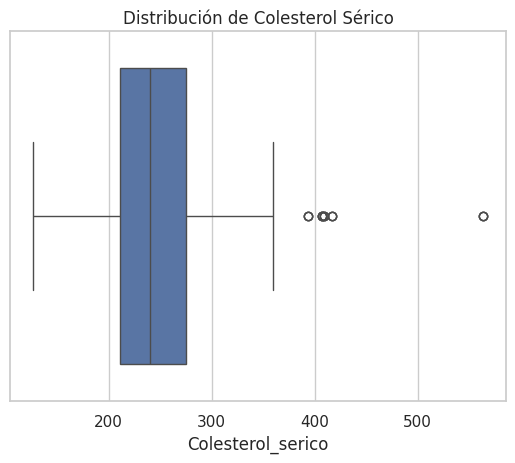

In [ ]:
sns.set(style='whitegrid')
sns.boxplot(x=df['Colesterol_serico'])
plt.title('Distribución de Colesterol Sérico')

#Rango Intercuartílico
iqr_c = df['Colesterol_serico'].quantile(0.75) - df['Colesterol_serico'].quantile(0.25)
print(f'Rango Intercuantílico: {iqr_c:,.2f} mg/dl')

#Obtendremos el límite inferior y superior de nuestra variable Edad.
Q1 = df['Colesterol_serico'].quantile(0.25)
Q3 = df['Colesterol_serico'].quantile (0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - (1.5* IQR)
limite_superior = Q3 + (1.5 * IQR)

print('Límite inferior de los bigotes:', limite_inferior)
print('Límite superior de los bigotes:', limite_superior)

El nivel de colesterol se recomienda que sea con un valor inferior a los 200 miligramos por decilitro (mg/dl). Entre 200 mg/dl  y los 239 mg/dl se considera elevado y es aconsejable reducirlo. De 240 mg/dl o más de colesterol, está elevado y es necesario reducirlo.

Cuadno el colesterol es muy alto, es posible que se formen depósitos grados en los vasos sanguíneos. Con el tiempo, estos depósitos crecen y hacen que sea más difícil que fluya suficiente sangre a través de las arterias. A veces, esos depósitos pueden romperse de repente y formar coágulos que causan un ataque cardíaco o un accidente cerebrovascular.

En el boxplot se puede observar que la mayoría de los pacientes tienen un colesterol elevado de 200. Además de tener valores atípicos que indian personas con un colesterol demasiado elevado, teniendo una mayor posibilidad de sufrir algún paro cardíaco.

Rango Intercuantílico: 34.00 latidos por minuto
Límite inferior de los bigotes: 81.0
Límite superior de los bigotes: 217.0


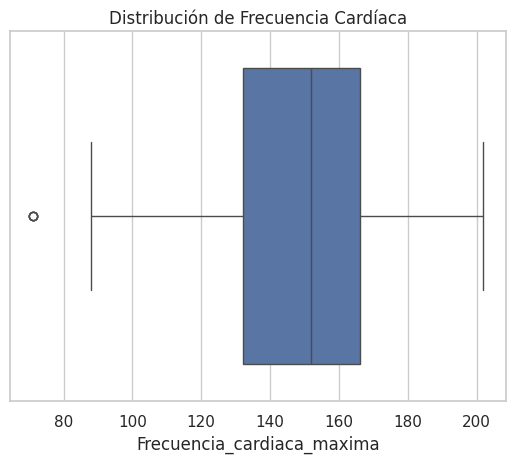

In [ ]:
sns.set(style='whitegrid')
sns.boxplot(x=df['Frecuencia_cardiaca_maxima'])
plt.title('Distribución de Frecuencia Cardíaca')

#Rango Intercuartílico
iqr_f = df['Frecuencia_cardiaca_maxima'].quantile(0.75) - df['Frecuencia_cardiaca_maxima'].quantile(0.25)
print(f'Rango Intercuantílico: {iqr_f:,.2f} latidos por minuto')

#Obtendremos el límite inferior y superior de nuestra variable Edad.
Q1 = df['Frecuencia_cardiaca_maxima'].quantile(0.25)
Q3 = df['Frecuencia_cardiaca_maxima'].quantile (0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - (1.5* IQR)
limite_superior = Q3 + (1.5 * IQR)

print('Límite inferior de los bigotes:', limite_inferior)
print('Límite superior de los bigotes:', limite_superior)

Una frecuencia cardíaca en reposo normal para los adultos oscila entre 60 y 100 latidos por minuto. En nuestro boxplot podemos observar que tenemos un valor atípico. Además de tener una asimetría negativa o sesgada a la izquierda, teniendo nuestra mediana en un valor de 152.

Rango Intercuantílico: 1.80 mm
Límite inferior de los bigotes: -2.7
Límite superior de los bigotes: 4.5


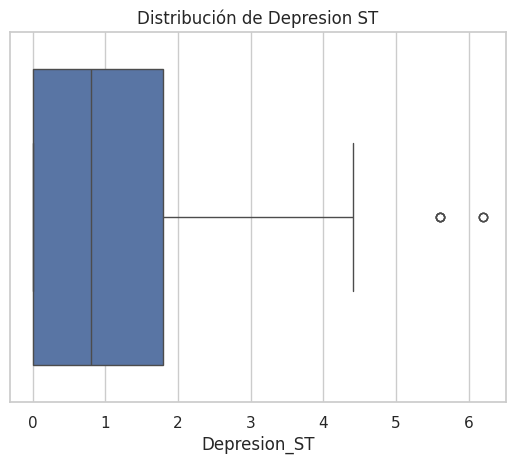

In [ ]:
sns.set(style='whitegrid')
sns.boxplot(x=df['Depresion_ST'])
plt.title('Distribución de Depresion ST')

#Rango Intercuartílico
iqr_d = df['Depresion_ST'].quantile(0.75) - df['Depresion_ST'].quantile(0.25)
print(f'Rango Intercuantílico: {iqr_d:,.2f} mm')

#Obtendremos el límite inferior y superior de nuestra variable Edad.
Q1 = df['Depresion_ST'].quantile(0.25)
Q3 = df['Depresion_ST'].quantile (0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - (1.5* IQR)
limite_superior = Q3 + (1.5 * IQR)

print('Límite inferior de los bigotes:', limite_inferior)
print('Límite superior de los bigotes:', limite_superior)

La depresión del segmento ST y la invesión de la onda T son alteraciones electrocardiográficas comunes. Conocer las diversas características morfológicas isquémicas y no isquémicas es fundamental para un diagnóstico oportuno de isquemia miocárdica y alteraciones relacionadas con electrolitos o fármacos

#Histogramas

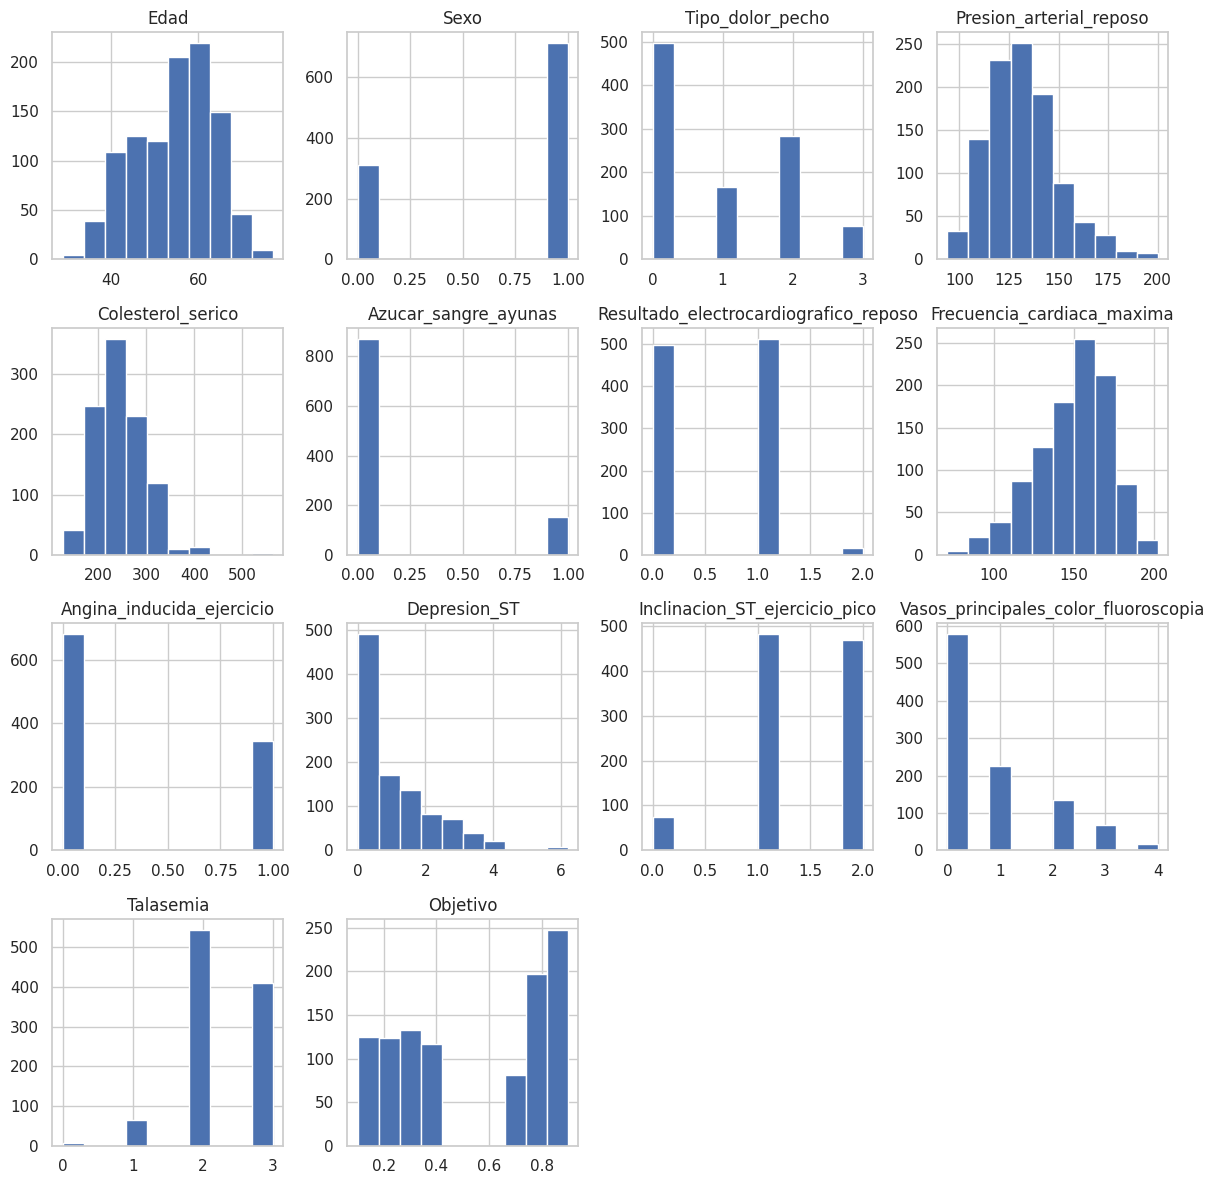

In [ ]:
# Graficar histogramas para variables numéricas
df.hist(figsize=(12, 12))
plt.tight_layout()
plt.show()

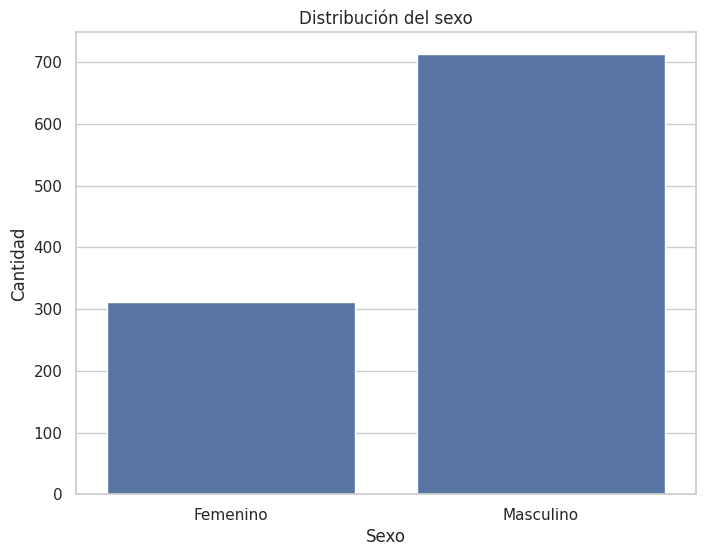

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sexo', hue_order=['Femenino', 'Masculino'])
plt.title('Distribución del sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Femenino', 'Masculino'])
plt.show()

De acuerdo con el gráfico de distribución del sexo, observamos que hay una mayor cantidad de hombres que de mujeres.

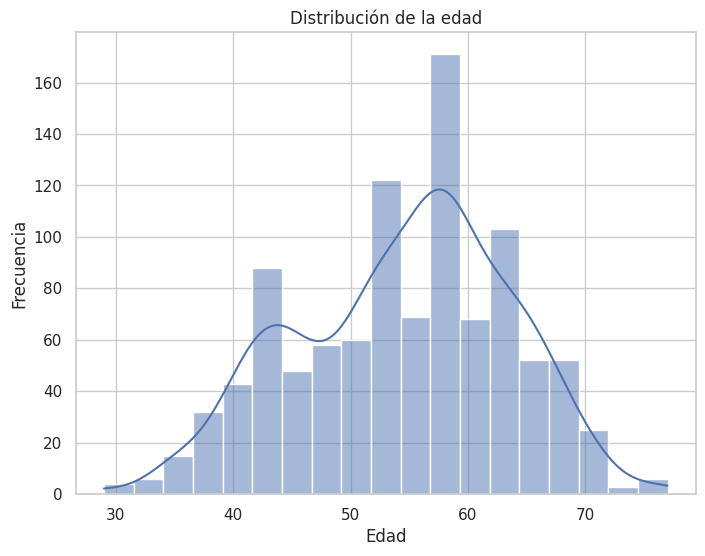

In [ ]:
# Histograma para la variable 'Edad'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Edad', kde=True)
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


La mayoría de los pacientes tienen una edad entre 50 y 60 años, aunque también tenemos pacientes que son un poco mayores de 40 años y otros mayores de 60 años.

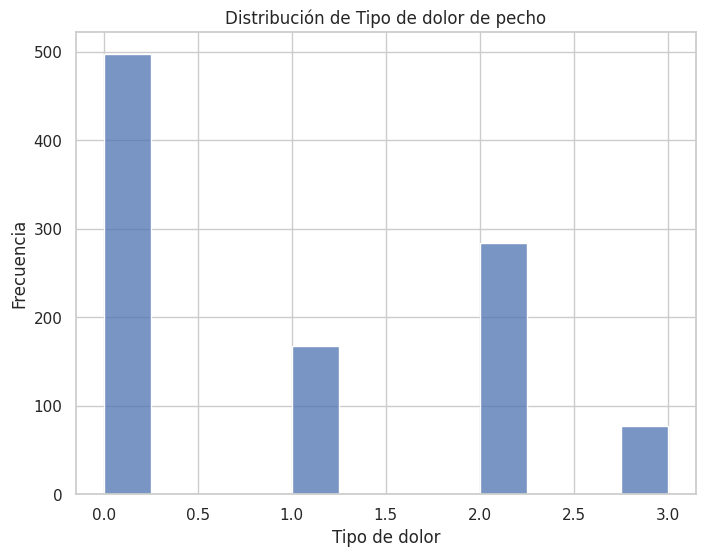

In [ ]:
# Histograma para la variable 'Tipo_dolor_pecho'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Tipo_dolor_pecho', kde=False)
plt.title('Distribución de Tipo de dolor de pecho')
plt.xlabel('Tipo de dolor')
plt.ylabel('Frecuencia')
plt.show()

De acuerdo con el dataset a cada tipo de dolor se le asigno un valor:

* Angina Típica = 0
* Angina Atipica = 1
* Dolor no anginoso = 2
* Asintomático = 3

Con estos datos, podemos observar que la mayoría de los pacientes sufren un dolor de pecho anfina típica.

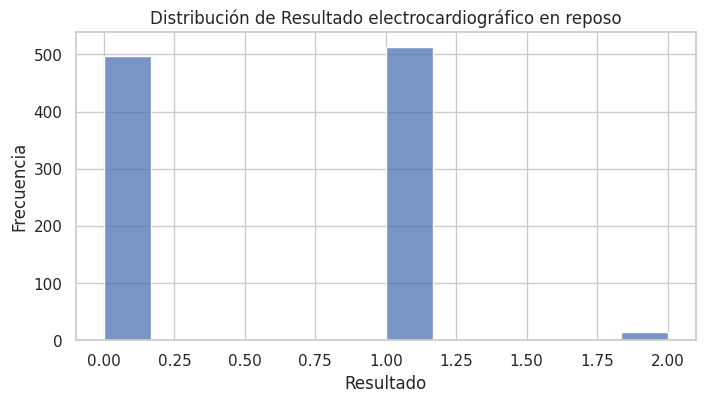

In [ ]:
# Histograma para la variable 'Resultado_electrocardiografico_reposo'
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Resultado_electrocardiografico_reposo', kde=False)
plt.title('Distribución de Resultado electrocardiográfico en reposo')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')
plt.show()

De acuerdo con el dataset, se dividen los resultados electrocardiográficos en tres diferentes valores:
* Normal: 0
* Anormal: 1
* Hipertrófico: 2

Los resultados normales son que la persona tiene una frecuencia cardiaca de 60 a 100 latidos por minuto y tienen un ritmo cardíaco constante y uniforme.

Las personas con resultados anormales es porque pudieron tener un ataque cardíaco en el paso o en ese momento, tienen una inflamación del corazón, sufren de arritmias, cambios en la cantidad de electrólitos en la sangre o hay un daño en el miocardio.

Hipertrófico son personas que requieren una cirugía porque están teniendo una insuficiencia cardíaca.

Los datos del dataset muestran que menos de 500 personas tienen una frecuencia cardiaca normal, mientras que un poco más de 500 personas obtuvieron resultados anormales, por lo que podrían sufrir algún daño en su corazón.

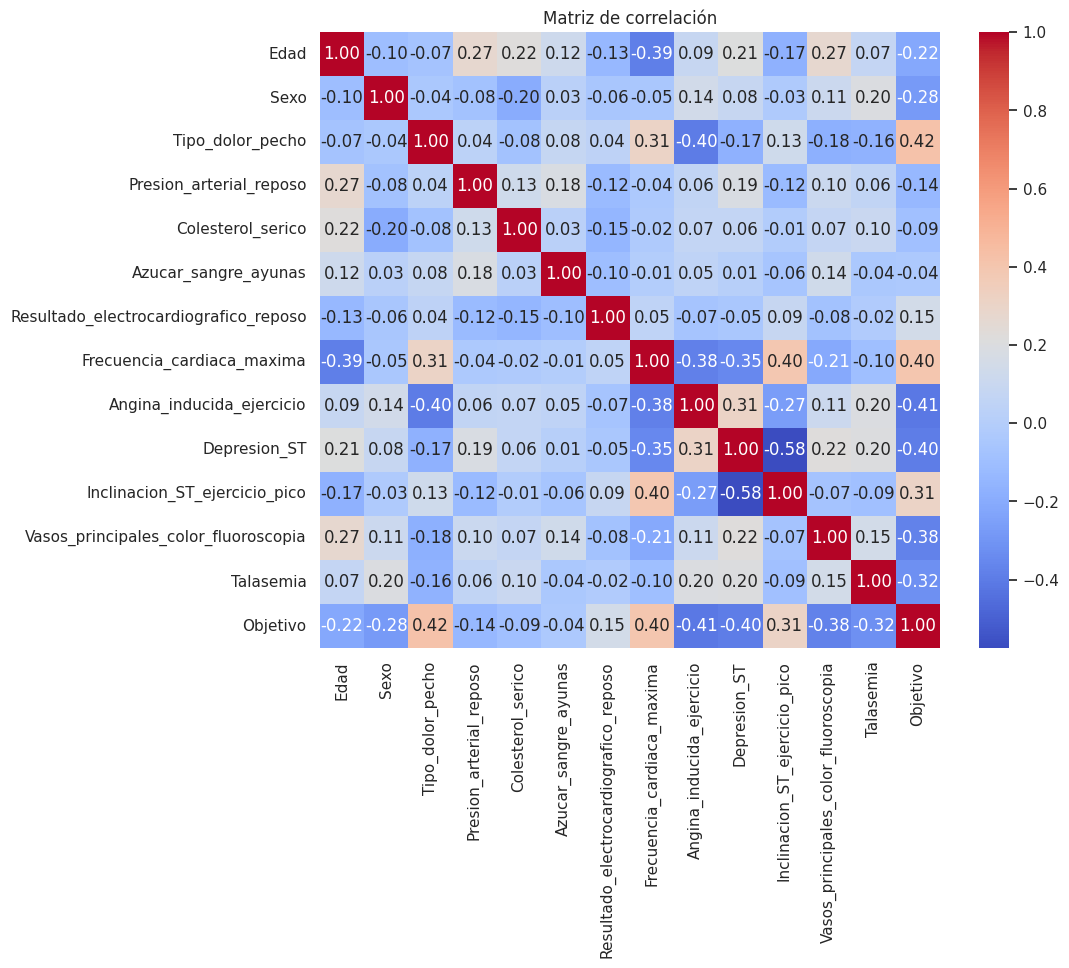

In [ ]:
# Calcular matriz de correlación
correlation_matrix = df.corr()

# Graficar matriz de correlación usando un mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


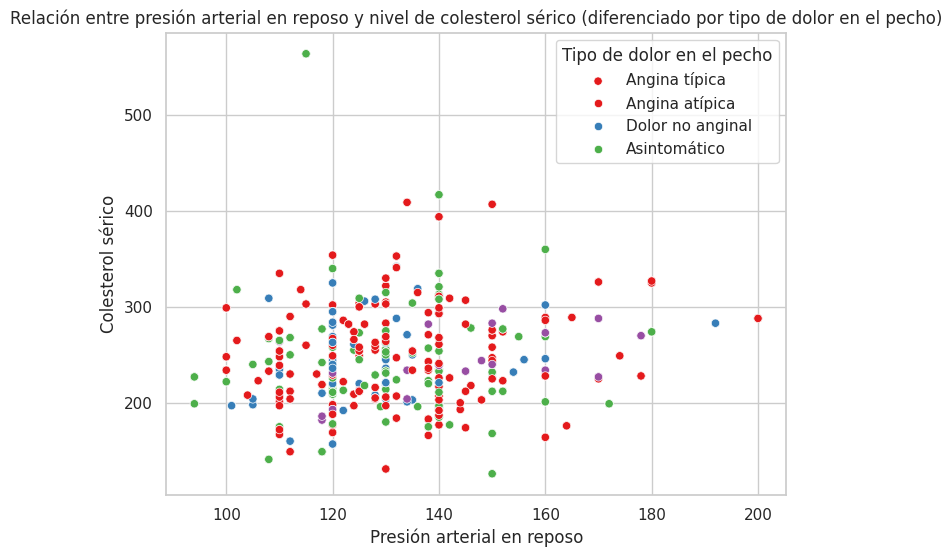

In [ ]:
tipo_dolor_pecho_dict = {
    0: 'Angina típica',
    1: 'Angina atípica',
    2: 'Dolor no anginal',
    3: 'Asintomático'
}
# Diagrama de dispersión entre 'trestbps' y 'chol' diferenciando por 'cp'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Presion_arterial_reposo', y='Colesterol_serico', hue='Tipo_dolor_pecho', palette='Set1')
plt.title('Relación entre presión arterial en reposo y nivel de colesterol sérico (diferenciado por tipo de dolor en el pecho)')
plt.xlabel('Presión arterial en reposo')
plt.ylabel('Colesterol sérico')

# Remplazar etiquetas del eje hue (tipo de dolor de pecho)
plt.legend(title='Tipo de dolor en el pecho', labels=[tipo_dolor_pecho_dict[i] for i in range(len(tipo_dolor_pecho_dict))])
plt.show()



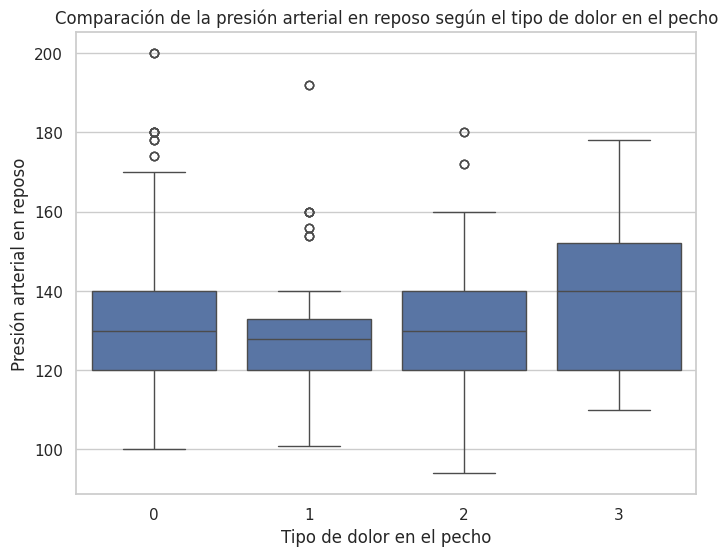

In [ ]:
# Comparación de la presión arterial en reposo entre pacientes con y sin angina de pecho
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Tipo_dolor_pecho', y='Presion_arterial_reposo')
plt.title('Comparación de la presión arterial en reposo según el tipo de dolor en el pecho')
plt.xlabel('Tipo de dolor en el pecho')
plt.ylabel('Presión arterial en reposo')
plt.show()


De acuerdo con la regresión lineal la edad y la presión arterial en reposo tienen una relación significativa.

# **Muestreo Aleatorio**

Para evitar sesgos al momento de realizar nuestros analisis hacemos uso del muestreo aleatorio, en el que todas las entradas tienen la misma probabilidad de aparecer en nuestra muestra.

Realizamos el proceso sobre nuestras variables númericas y comparamos su distribucion con la del total de los datos:

In [ ]:
df_muestra = df[['Edad', 'Colesterol_serico', 'Frecuencia_cardiaca_maxima']].sample(n=200, replace=False)
df_muestra

,Edad,Colesterol_serico,Frecuencia_cardiaca_maxima
727,56,221,163
71,61,207,138
607,42,315,125
926,54,206,108
27,58,319,152
...,...,...,...
949,57,207,168
437,67,229,129
40,65,360,151
240,54,288,159


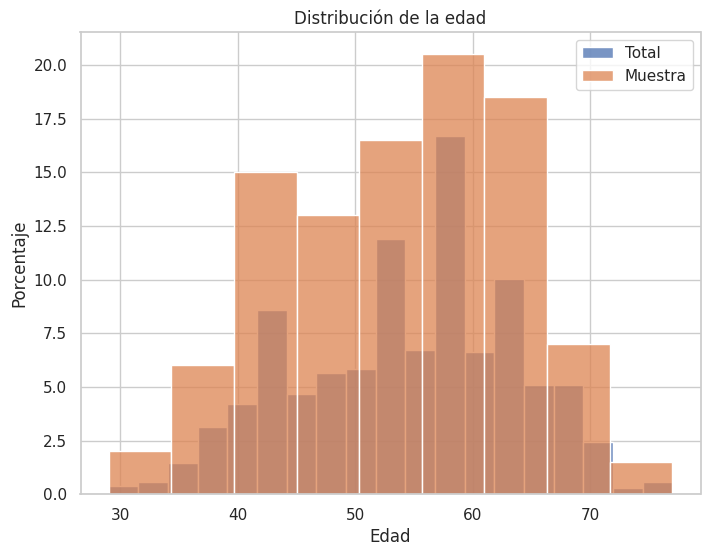

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Edad', stat='percent', label='Total')
sns.histplot(df_muestra, x='Edad', stat='percent', label='Muestra')
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Porcentaje')
plt.legend()
plt.show()

#Módulo 3.Machine Learning

**Machine Learning** es un sistema complejo que aprende y mejora su respuesta con los datos que recibe de entrada.

Llamamos a nuestro dataset, títulado como "Heart Attack Prediction", la definimos en una variable llamada "df".

In [ ]:
df.head()

,Edad,Sexo,Tipo_dolor_pecho,Presion_arterial_reposo,Colesterol_serico,Azucar_sangre_ayunas,Resultado_electrocardiografico_reposo,Frecuencia_cardiaca_maxima,Angina_inducida_ejercicio,Depresion_ST,Inclinacion_ST_ejercicio_pico,Vasos_principales_color_fluoroscopia,Talasemia,Objetivo
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


Utilizamos el método infor para ver un resumen de neustro dataframe.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Edad                                   1025 non-null   int64  
 1   Sexo                                   1025 non-null   int64  
 2   Tipo_dolor_pecho                       1025 non-null   int64  
 3   Presion_arterial_reposo                1025 non-null   int64  
 4   Colesterol_serico                      1025 non-null   int64  
 5   Azucar_sangre_ayunas                   1025 non-null   int64  
 6   Resultado_electrocardiografico_reposo  1025 non-null   int64  
 7   Frecuencia_cardiaca_maxima             1025 non-null   int64  
 8   Angina_inducida_ejercicio              1025 non-null   int64  
 9   Depresion_ST                           1025 non-null   float64
 10  Inclinacion_ST_ejercicio_pico          1025 non-null   int64  
 11  Vaso

#Separación de datos

Separamos nuestro conjunto de datos en tres fragmentos:

- Partición de entrenamiento
- Partición de validación
- Partición de prueba.

Partimos nuestro dataset en 2 secciones, conjunto de entranmiento y conjunto de prueba, donde el 80% de nuestros datos son para entrenamiento y el 20% de prueba.  

In [ ]:
X = df[['Edad', 'Sexo', 'Colesterol_serico', 'Presion_arterial_reposo', 'Frecuencia_cardiaca_maxima', 'Angina_inducida_ejercicio', 'Depresion_ST']]
y = df['Objetivo']

In [ ]:
# Separar características (X) y etiquetas (y)
X = df[['Edad', 'Sexo', 'Colesterol_serico', 'Presion_arterial_reposo', 'Frecuencia_cardiaca_maxima', 'Angina_inducida_ejercicio', 'Depresion_ST']]
y = df['Objetivo']

# Crear particiones de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar el tamaño de las particiones
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])

Tamaño del conjunto de entrenamiento: 820
Tamaño del conjunto de prueba: 205


Ahora utilizaremos KFold para evaluar la capacidad del modelo y poder seleccionar los hiperparámetros. Dividiremos nuestro conjunto de datos en 5 particiones de igual tamaño.

In [ ]:
# Separar características (X) y etiquetas (y)
X = df[['Edad', 'Sexo', 'Colesterol_serico', 'Presion_arterial_reposo', 'Frecuencia_cardiaca_maxima', 'Angina_inducida_ejercicio', 'Depresion_ST']]
y = df['Objetivo']

# Definir el número de folds
K = 5

# Crear el objeto KFold
kf = KFold(n_splits= K, shuffle=True, random_state=42)

# Iterar sobre los folds
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Aquí puedes entrenar tu modelo y evaluarlo en cada fold
    # Por ejemplo:
    # model.fit(X_train, y_train)
    # score = model.score(X_test, y_test)

    print(f"Fold {fold+1}: Tamaño del conjunto de entrenamiento: {len(X_train)}, Tamaño del conjunto de prueba: {len(X_test)}")


Fold 1: Tamaño del conjunto de entrenamiento: 820, Tamaño del conjunto de prueba: 205
Fold 2: Tamaño del conjunto de entrenamiento: 820, Tamaño del conjunto de prueba: 205
Fold 3: Tamaño del conjunto de entrenamiento: 820, Tamaño del conjunto de prueba: 205
Fold 4: Tamaño del conjunto de entrenamiento: 820, Tamaño del conjunto de prueba: 205
Fold 5: Tamaño del conjunto de entrenamiento: 820, Tamaño del conjunto de prueba: 205


Con el resutaldo observamos que se utilizo el 80% de los datos como entrenamiento y el 20% como prueba para cada ciclo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[5.59369369e+01 7.20720721e-01 1.00450450e+00 1.32180180e+02
  2.52288288e+02 1.62162162e-01 4.32432432e-01 1.47240991e+02
  3.51351351e-01 1.06126126e+00 1.30630631e+00 7.61261261e-01
  2.36261261e+00 4.72972973e-01]
 [5.16498674e+01 7.53315650e-01 1.01061008e+00 1.27920424e+02
  1.97596817e+02 1.22015915e-01 6.57824934e-01 1.50771883e+02
  2.94429708e-01 1.00928382e+00 1.45623342e+00 6.33952255e-01
  2.23342175e+00 6.10079576e-01]
 [5.63088235e+01 5.34313725e-01 6.81372549e-01 1.37196078e+02
  3.21764706e+02 1.71568627e-01 5.04901961e-01 1.50127451e+02
  3.82352941e-01 1.20882353e+00 1.42647059e+00 9.60784314e-01
  2.40686275e+00 4.21568627e-01]]


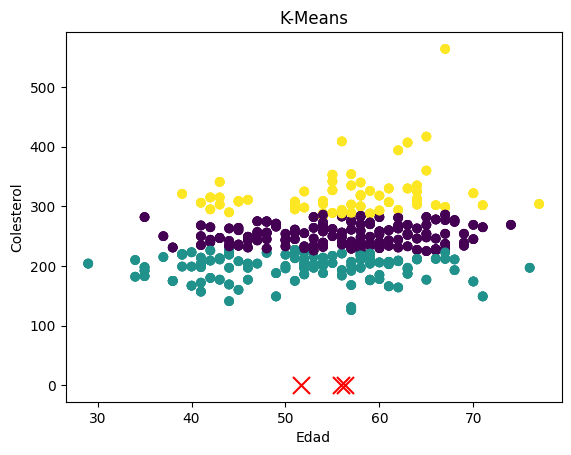

In [ ]:
# Crear una instancia del modelo KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustar el modelo a los datos
kmeans.fit(df)

# Obtener las etiquetas de los clusters
etiquetas = kmeans.labels_

# Obtener los centroides de los clusters
centroides = kmeans.cluster_centers_
print(centroides)

# Graficar los datos y los centroides
plt.scatter(df['Edad'], df['Colesterol_serico'], c=etiquetas)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=150, c='red')
plt.title('K-Means')
plt.xlabel('Edad')
plt.ylabel('Colesterol')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[5.59369369e+01 7.20720721e-01 1.00450450e+00 1.32180180e+02
  2.52288288e+02 1.62162162e-01 4.32432432e-01 1.47240991e+02
  3.51351351e-01 1.06126126e+00 1.30630631e+00 7.61261261e-01
  2.36261261e+00 4.72972973e-01]
 [5.16498674e+01 7.53315650e-01 1.01061008e+00 1.27920424e+02
  1.97596817e+02 1.22015915e-01 6.57824934e-01 1.50771883e+02
  2.94429708e-01 1.00928382e+00 1.45623342e+00 6.33952255e-01
  2.23342175e+00 6.10079576e-01]
 [5.63088235e+01 5.34313725e-01 6.81372549e-01 1.37196078e+02
  3.21764706e+02 1.71568627e-01 5.04901961e-01 1.50127451e+02
  3.82352941e-01 1.20882353e+00 1.42647059e+00 9.60784314e-01
  2.40686275e+00 4.21568627e-01]]


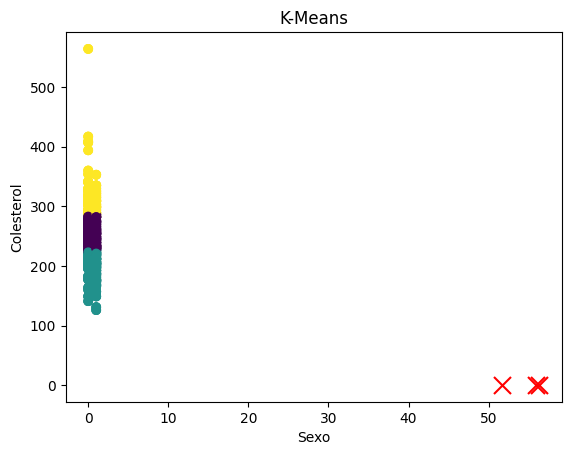

In [ ]:
# Crear una instancia del modelo KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustar el modelo a los datos
kmeans.fit(df)

# Obtener las etiquetas de los clusters
etiquetas = kmeans.labels_

# Obtener los centroides de los clusters
centroides = kmeans.cluster_centers_
print(centroides)

# Graficar los datos y los centroides
plt.scatter(df['Sexo'], df['Colesterol_serico'], c=etiquetas)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=150, c='red')
plt.title('K-Means')
plt.xlabel('Sexo')
plt.ylabel('Colesterol')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[5.59369369e+01 7.20720721e-01 1.00450450e+00 1.32180180e+02
  2.52288288e+02 1.62162162e-01 4.32432432e-01 1.47240991e+02
  3.51351351e-01 1.06126126e+00 1.30630631e+00 7.61261261e-01
  2.36261261e+00 5.08783784e-01]
 [5.16498674e+01 7.53315650e-01 1.01061008e+00 1.27920424e+02
  1.97596817e+02 1.22015915e-01 6.57824934e-01 1.50771883e+02
  2.94429708e-01 1.00928382e+00 1.45623342e+00 6.33952255e-01
  2.23342175e+00 5.92811671e-01]
 [5.63088235e+01 5.34313725e-01 6.81372549e-01 1.37196078e+02
  3.21764706e+02 1.71568627e-01 5.04901961e-01 1.50127451e+02
  3.82352941e-01 1.20882353e+00 1.42647059e+00 9.60784314e-01
  2.40686275e+00 4.92205882e-01]]


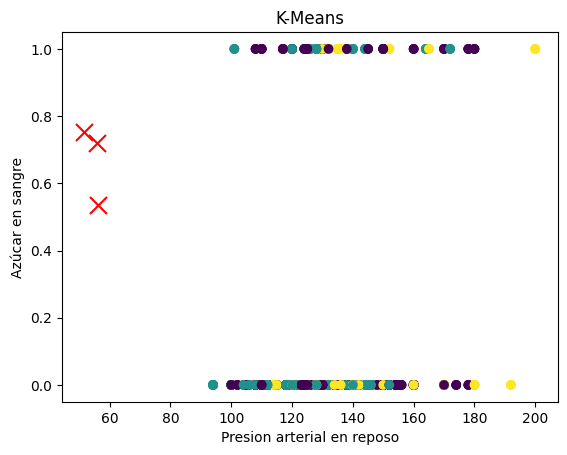

In [ ]:
# Crear una instancia del modelo KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustar el modelo a los datos
kmeans.fit(df)

# Obtener las etiquetas de los clusters
etiquetas = kmeans.labels_

# Obtener los centroides de los clusters
centroides = kmeans.cluster_centers_
print(centroides)

# Graficar los datos y los centroides
plt.scatter(df['Presion_arterial_reposo'], df['Azucar_sangre_ayunas'], c=etiquetas)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=150, c='red')
plt.title('K-Means')
plt.xlabel('Presion arterial en reposo')
plt.ylabel('Azúcar en sangre')
plt.show()

Con base a los gráficos anteriores, las cruces rojas son nuestros centroides, pero no se encuentran en el centro de nuestra información porque existe una distribución irregular o sesgada. Esto puede ser debido a que nuestros dados **no** son aptos para un **modelo no supervisado**.

Esta suposicion la creemos porque recordemos que para utilizar un modelo no supervisado, debes tener las entradas, pero no tienes idea de que deseas obtener como resultado de salida y en nuestro dataser si tiene un valor esperado.

In [ ]:
df['Objetivo'] = df['Objetivo'].apply(lambda x: 1 if x >= 0.5 else 0)

In [ ]:
df.head()

,Edad,Sexo,Tipo_dolor_pecho,Presion_arterial_reposo,Colesterol_serico,Azucar_sangre_ayunas,Resultado_electrocardiografico_reposo,Frecuencia_cardiaca_maxima,Angina_inducida_ejercicio,Depresion_ST,Inclinacion_ST_ejercicio_pico,Vasos_principales_color_fluoroscopia,Talasemia,Objetivo
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#Regresion Logistica

Precision: 0.75

Confusion Matrix:
[[74 28]
 [23 80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       102
           1       0.74      0.78      0.76       103

    accuracy                           0.75       205
   macro avg       0.75      0.75      0.75       205
weighted avg       0.75      0.75      0.75       205

True positives: 80
True negatives: 74
False positives: 28
False negatives: 23


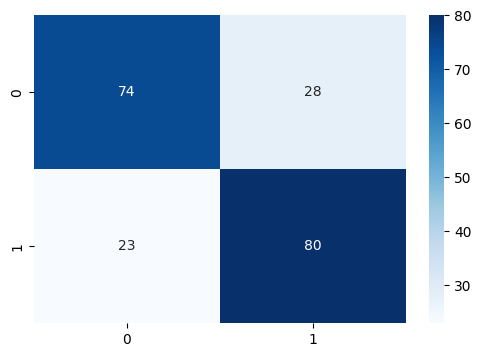

In [ ]:
X = df[['Edad', 'Sexo', 'Colesterol_serico', 'Presion_arterial_reposo', 'Frecuencia_cardiaca_maxima', 'Angina_inducida_ejercicio', 'Depresion_ST']]
y = df['Objetivo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
Lr_model = LogisticRegression(random_state=42)
Lr_model.fit(X_train_scaled, y_train)
y_pred = Lr_model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
classification_rep = classification_report(y_test, y_pred)

print(f'Precision: {accuracy_lr:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

(TN, FP, FN, TP) = conf_matrix.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negatives: "+str(FN))

In [ ]:
#Calcula la precisión, sensibilidad y especificidad
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

Precision:75.1219512195122%
Sensibilidad:77.66990291262135%
Especificidad:72.54901960784314%


Al evaluar nuestro modelo de regresión logística, observamos una precisión general del 75%, lo que indica que el 75% de las predicciones realizadas por el modelo son precisas. Aunque este rendimiento es razonable, es importante considerar otras métricas de evaluación para obtener una comprensión más completa de su eficacia.

Al revisar la matriz de confusión, notamos que el modelo clasificó correctamente el 73% de los casos negativos y el 78% de los casos positivos. Sin embargo, también identificó incorrectamente el 28% de los casos negativos como positivos y el 23% de los casos positivos como negativos.

En detalle, la matriz de confusión muestra que el modelo predijo correctamente 80 casos como positivos (Verdaderos Positivos, TP) y 74 casos como negativos (Verdaderos Negativos, TN). Sin embargo, también se observa que el modelo cometió errores al predecir 28 casos como positivos cuando eran negativos (Falsos Positivos, FP), y 23 casos como negativos cuando eran positivos (Falsos Negativos, FN).

Además, las métricas de precisión y recall proporcionan información valiosa sobre el rendimiento del modelo en cada clase. La precisión, que indica la proporción de predicciones positivas correctas, es del 76% para la clase negativa y del 74% para la clase positiva. Mientras tanto, el recall, que muestra la proporción de casos positivos reales identificados correctamente, es del 73% para la clase negativa y del 78% para la clase positiva.

Finalmente, la puntuación F1, que es el promedio ponderado de precisión y recall, equilibra la precisión y el recall en una sola métrica. En este caso, la puntuación F1 media ponderada es del 75%.

##Support Vector Machine


Support Vector Machine:
Accuracy: 0.68

Confusion Matrix:
[[63 39]
 [27 76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       102
           1       0.66      0.74      0.70       103

    accuracy                           0.68       205
   macro avg       0.68      0.68      0.68       205
weighted avg       0.68      0.68      0.68       205

True positives: 76
True negatives: 63
False positives: 39
False negatives: 27


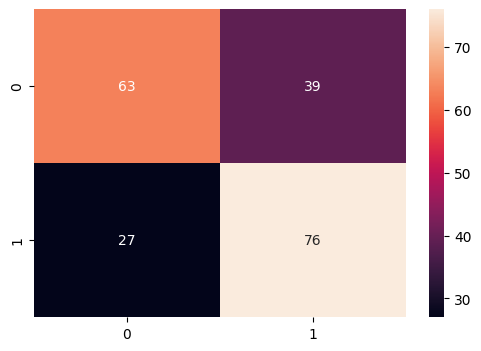

In [ ]:
#Modelo: Support Vector Machine
print("\nSupport Vector Machine:")
X = df[['Edad', 'Sexo', 'Colesterol_serico', 'Presion_arterial_reposo', 'Frecuencia_cardiaca_maxima', 'Angina_inducida_ejercicio', 'Depresion_ST']]
y = df['Objetivo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='rbf',random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='g')
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy_svm:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

(TN, FP, FN, TP) = conf_matrix.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negatives: "+str(FN))

In [ ]:
acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

Precision:67.8048780487805%
Sensibilidad:73.7864077669903%
Especificidad:61.76470588235294%


Al evaluar nuestro modelo de Support Vector Machine, observamos una precisión general del 68%, lo que indica que el 68% de las predicciones realizadas por el modelo son precisas.

Al revisar la matriz de confusión, notamos que el modelo clasificó correctamente el 63% de los casos negativos y el 76% de los casos positivos. Sin embargo, también identificó incorrectamente el 39% de los casos negativos como positivos y el 27% de los casos positivos como negativos.

Por lo tanto, este modelo no es adecuado para nuestro dataset al tener una mala clasificación de los datos.

Ahora trabajaremos con los modelos supervisados, esto con el fin de encontrar el modelo que se ajuste adecuadamente con nuestro dataset.

# Random Forest

Accuracy: 1.00

Confusion Matrix:
[[102   0]
 [  0 103]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

True positives: 103
True negatives: 102
False positives: 0
False negatives: 0


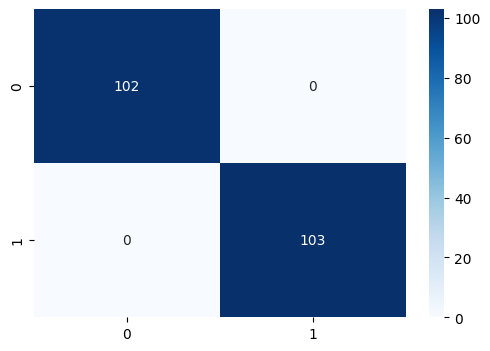

In [ ]:
X = df[['Edad', 'Sexo', 'Colesterol_serico', 'Presion_arterial_reposo', 'Frecuencia_cardiaca_maxima', 'Angina_inducida_ejercicio', 'Depresion_ST']]
y = df['Objetivo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfmodel = RandomForestClassifier(random_state=42)
rfmodel.fit(X_train, y_train)

y_pred = rfmodel.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy_rf:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

(TN, FP, FN, TP) = conf_matrix.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negatives: "+str(FN))

In [ ]:
acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

Precision:100.0%
Sensibilidad:100.0%
Especificidad:100.0%


Al evaluar nuestro modelo de Random Forest, observamos una precisión perfecta del 100%, lo que indica que todas las predicciones realizadas por el modelo son correctas. Este alto nivel de precisión es muy prometedor y sugiere que el modelo es altamente efectivo en la clasificación de los datos.

La matriz de confusión confirma este rendimiento impecable, mostrando que el modelo clasificó correctamente todos los casos tanto como positivos como negativos. No se observan falsos positivos ni falsos negativos en la matriz de confusión, lo que indica una predicción perfecta para ambos grupos.

El reporte de clasificación respalda estos hallazgos, mostrando métricas de precisión, recall y F1-score de 1 para ambas clases. Esto significa que el modelo clasificó correctamente todos los casos positivos y negativos, sin errores.

<ipython-input-33-778e6ebdd410>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models_accuracy.keys()), y=list(models_accuracy.values()), palette='viridis')


Text(0, 0.5, 'Exactitud')

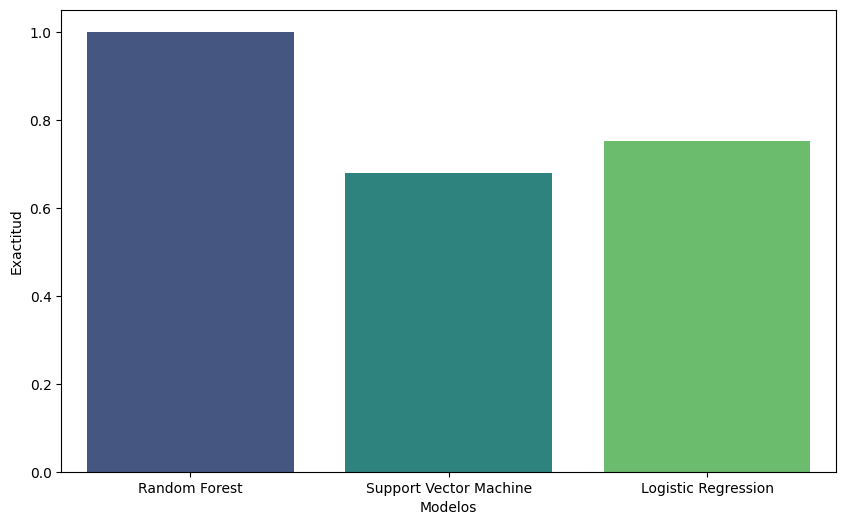

In [ ]:
models_accuracy = {'Random Forest': accuracy_rf,
                   'Support Vector Machine': accuracy_svm,
                   'Logistic Regression':accuracy_lr}

plt.figure(figsize=(10,6))
sns.barplot(x=list(models_accuracy.keys()), y=list(models_accuracy.values()), palette='viridis')
plt.xlabel('Modelos')
plt.ylabel('Exactitud')

De acuerdo con los resultados de los modelos y de acuerdo con la gráfica de los valores de exactitud de los modelos, el mejor modelo para nuestro dataset es el Random Forest O Árbol de decisiones.

Un Random Forest es un modelo supervisado que se utiliza para clasificación y regresión, donde se requieren datos etiquetas para entrar el modelo y hacer predicciones sobre las muestras.

##Red neuronal

In [ ]:
# Divide los datos en características (X) y etiquetas (y)
X = df[['Edad', 'Sexo', 'Colesterol_serico', 'Presion_arterial_reposo', 'Frecuencia_cardiaca_maxima', 'Angina_inducida_ejercicio', 'Depresion_ST']]
y = df['Objetivo']

# Normaliza los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compila el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrena el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)

# Evalúa el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/10
26/26 - 2s - loss: 0.6526 - accuracy: 0.6476 - 2s/epoch - 66ms/step
Epoch 2/10
26/26 - 0s - loss: 0.5161 - accuracy: 0.7976 - 49ms/epoch - 2ms/step
Epoch 3/10
26/26 - 0s - loss: 0.4537 - accuracy: 0.8159 - 51ms/epoch - 2ms/step
Epoch 4/10
26/26 - 0s - loss: 0.4280 - accuracy: 0.8244 - 56ms/epoch - 2ms/step
Epoch 5/10
26/26 - 0s - loss: 0.4138 - accuracy: 0.8293 - 55ms/epoch - 2ms/step
Epoch 6/10
26/26 - 0s - loss: 0.4030 - accuracy: 0.8293 - 74ms/epoch - 3ms/step
Epoch 7/10
26/26 - 0s - loss: 0.3944 - accuracy: 0.8329 - 57ms/epoch - 2ms/step
Epoch 8/10
26/26 - 0s - loss: 0.3873 - accuracy: 0.8305 - 47ms/epoch - 2ms/step
Epoch 9/10
26/26 - 0s - loss: 0.3821 - accuracy: 0.8341 - 58ms/epoch - 2ms/step
Epoch 10/10
26/26 - 0s - loss: 0.3746 - accuracy: 0.8366 - 47ms/epoch - 2ms/step
Loss: 0.43111810088157654, Accuracy: 0.790243923664093


Al evaluar nuestro modelo de red neuronal, observamos una precisión del 79.02%, lo que indica que aproximadamente el 79.02% de las predicciones realizadas por el modelo son correctas. Este resultado es un buen indicador del rendimiento del modelo, pero es importante considerar otras métricas para obtener una comprensión más completa de su eficacia.

Durante el entrenamiento del modelo, se observa un progreso de pérdida y aumento en la precisión con cada época. Esto sugiere que el modelo está aprendiendo de manera efectiva los patrones en los datos de entrenamiento.

El valor de pérdida final obtenido en el conjunto de prueba es de aproximadamente 0.4311, lo que indica la cantidad promedio de error del modelo en sus predicciones. Además, la precisión alcanzada en el conjunto de prueba es del 79.02%, lo que respalda la precisión observada durante el entrenamiento.